In [59]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
import datetime

In [102]:
#read weather data into a dataframe

#weather data extracted from https://www.visualcrossing.com/weather-data

weather_df = pd.read_csv("NYC_201701_weather.csv" ,low_memory=False, encoding = 'ISO-8859-1' )
weather_df = weather_df.loc[:, ["Date time", "Temperature", "Wind Speed", "Snow Depth"]]
weather_df.fillna(0, inplace=True)

#converting date format to match taxi data
date_ls = []
format_str = '%m/%d/%Y'
for date_str in weather_df["Date time"]: 
    date_ls.append(datetime.datetime.strptime(date_str, format_str).strftime("%Y-%m-%d"))
    
weather_df["Date time"] = date_ls
weather_df = weather_df.rename(columns={"Date time": "Date"})

#converting from Fahrenheit to Celsius
weather_df['Temperature'] = round((weather_df['Temperature'] - 32)/1.8, 2)

#weather_df


,Date,Temperature,Wind Speed,Snow Depth
0,2017-01-01,7.83,14.6,0.0
1,2017-01-02,4.78,17.2,0.0
2,2017-01-03,5.78,21.6,0.0
3,2017-01-04,7.11,20.7,0.0
4,2017-01-05,-0.06,19.4,0.0
5,2017-01-06,-0.17,10.1,1.2
6,2017-01-07,-3.39,19.3,5.9
7,2017-01-08,-4.89,12.7,7.1
8,2017-01-09,-6.11,13.5,5.9
9,2017-01-10,-0.28,11.1,3.1


In [141]:
#get yellow taxi data for NYC, sort and group by each day
yellow_201701_df =  pd.read_csv("summary_201701.csv" ,low_memory=False, encoding = 'ISO-8859-1' )

yellow_201701_df['pickup_time'] = pd.to_datetime(yellow_201701_df['pickup_time'])

each_day_df = pd.DataFrame()
each_day_df = yellow_201701_df.groupby(by=yellow_201701_df['pickup_time'].dt.date)['tip'].sum().reset_index(name='tips')
each_day_df['trip_count'] =  yellow_201701_df.groupby(by=yellow_201701_df['pickup_time'].dt.date).count()['pickup_time'].values
each_day_df['avg_tips'] = each_day_df['tips']/each_day_df['trip_count']

each_day_df.head()

,pickup_time,tips,trip_count,avg_tips
0,2017-01-01,435428.44,146039,2.981590
1,2017-01-02,353532.61,125279,2.821962
2,2017-01-03,445811.79,164922,2.703167
3,2017-01-04,479491.44,177875,2.695665
4,2017-01-05,536285.82,206019,2.603089


In [142]:
merged = each_day_df.join(weather_df).drop(['Date'], axis=1)
merged = merged.rename(columns={"pickup_time": "Date"})
merged

,Date,tips,trip_count,avg_tips,Temperature,Wind Speed,Snow Depth
0,2017-01-01,435428.44,146039,2.981590,7.83,14.6,0.0
1,2017-01-02,353532.61,125279,2.821962,4.78,17.2,0.0
2,2017-01-03,445811.79,164922,2.703167,5.78,21.6,0.0
3,2017-01-04,479491.44,177875,2.695665,7.11,20.7,0.0
4,2017-01-05,536285.82,206019,2.603089,-0.06,19.4,0.0
5,2017-01-06,553817.68,216289,2.560545,-0.17,10.1,1.2
6,2017-01-07,460069.25,186405,2.468116,-3.39,19.3,5.9
7,2017-01-08,488685.06,182656,2.675439,-4.89,12.7,7.1
8,2017-01-09,539810.02,195772,2.757340,-6.11,13.5,5.9
9,2017-01-10,551083.39,202829,2.716985,-0.28,11.1,3.1


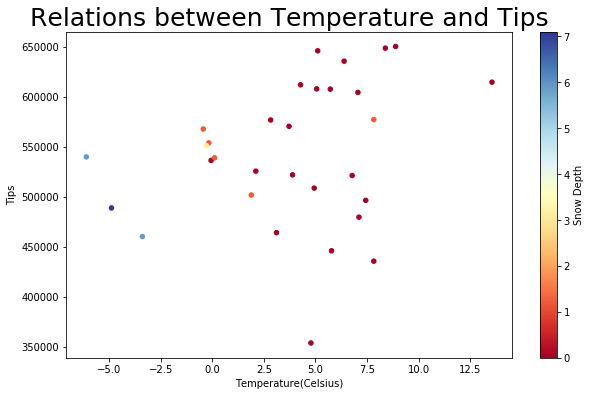

In [125]:
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot.scatter(x='Temperature',y='tips', c='Snow Depth', colormap='RdYlBu', ax = ax)
plt.title("Relations between Temperature and Tips", fontdict={'fontsize': '25', 'fontweight': '3'})
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Tips")
plt.show()            
fig.savefig('Temperature and Tips.png', dpi=300)

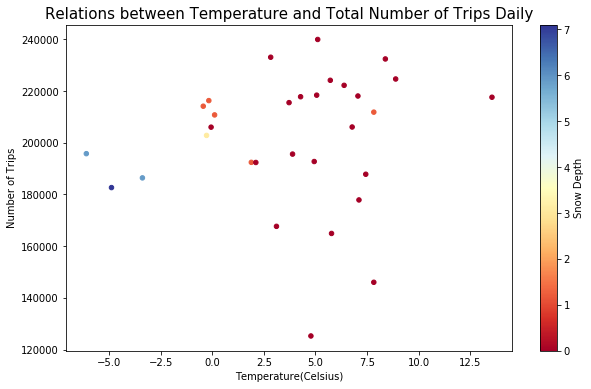

In [149]:
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot.scatter(x='Temperature',y='trip_count', c='Snow Depth', colormap='RdYlBu', ax = ax)
plt.title("Relations between Temperature and Total Number of Trips Daily", fontdict={'fontsize': '15', 'fontweight': '3'})
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Number of Trips")
plt.show()            
fig.savefig('Temperature and Number of Trips.png', dpi=300)

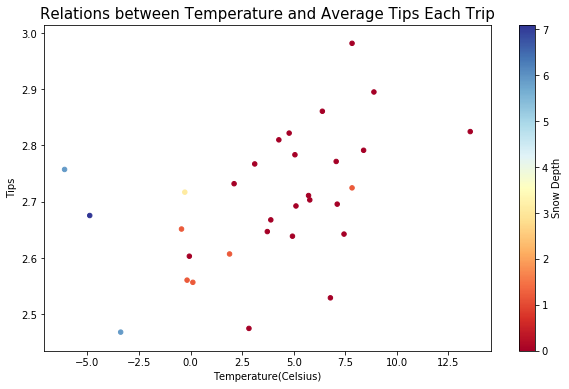

In [148]:
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot.scatter(x='Temperature',y='avg_tips', c='Snow Depth', colormap='RdYlBu', ax = ax)
plt.title("Relations between Temperature and Average Tips Each Trip", fontdict={'fontsize': '15', 'fontweight': '3'})
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Tips")
plt.show()            
fig.savefig('Temperature and Average Tips.png', dpi=300)